# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import cv2  

import numpy as np
from glob import glob

import matplotlib.pyplot as plt  
%matplotlib inline  

In [2]:
# By @smth 
import sys
import psutil
import gc
import os
    
def cpuStats():
        print(sys.version)
        print(psutil.cpu_percent())
        print(psutil.virtual_memory())  # physical memory usage
        pid = os.getpid()
        py = psutil.Process(pid)
        memoryUse = py.memory_info()[0] / 2. ** 30  # memory use in GB...I think
        print('memory GB:', memoryUse)

cpuStats()

3.6.3 | packaged by conda-forge | (default, Nov  4 2017, 10:10:56) 
[GCC 4.8.2 20140120 (Red Hat 4.8.2-15)]
0.0
svmem(total=16819822592, available=15789850624, percent=6.1, used=671473664, free=8028352512, active=1128792064, inactive=7004479488, buffers=197586944, cached=7922409472, shared=9691136)
memory GB: 0.08404159545898438


In [3]:

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


In [4]:
cpuStats()

3.6.3 | packaged by conda-forge | (default, Nov  4 2017, 10:10:56) 
[GCC 4.8.2 20140120 (Red Hat 4.8.2-15)]
3.5
svmem(total=16819830784, available=15784423424, percent=6.2, used=676888576, free=7783981056, active=1932341248, inactive=6508699648, buffers=193351680, cached=8165609472, shared=9695232)
memory GB: 0.09311676025390625


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


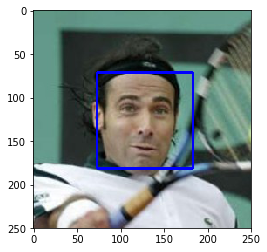

In [5]:
# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[1])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [6]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 

As we can see from the result below, our face_detector only get 98% accuracy in human face detecting.
And also misclssified 17% dog images to human.

In [7]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

faces_human = []
faces_dog = []
## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

for i in range(100):
    face_human_true = face_detector(human_files_short[i])
    face_dog_true = face_detector(dog_files_short[i])
    
    if face_human_true:
        faces_human.append(face_human_true)
    if face_dog_true:
        faces_dog.append(face_dog_true)

print(len(faces_human))
print(len(faces_dog))

98
17


In [8]:
performance_human_face = len(faces_human) 
mis_classify_dog_face = (len(faces_dog))
print('%.1f%% of human images with a detected face and %.1f%% of dog images with a detected face.' %(performance_human_face, mis_classify_dog_face))

98.0% of human images with a detected face and 17.0% of dog images with a detected face.


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

### (Optional) 

## Deep Learning algorithm to detect faces

### keras

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from keras.losses import categorical_crossentropy

from sklearn.model_selection import StratifiedShuffleSplit
from scipy.sparse import coo_matrix
from sklearn.utils import shuffle

from sklearn.utils import class_weight

import gc

Using TensorFlow backend.


### Prepare dataset

In [10]:
def load_data(file_path, numbers_images):
    img_array = []
    for i in range(numbers_images):
        img = cv2.imread(file_path[i])
        img = cv2.resize(img, (32,32))

        img_array.append(img)
    img_array = np.array(img_array).astype('float32')/255
    return img_array

In [11]:
faces = load_data(human_files, len(human_files))
dogs = load_data(dog_files, len(dog_files))
X = np.concatenate((faces, dogs), axis = 0 )

In [12]:
cpuStats()

3.6.3 | packaged by conda-forge | (default, Nov  4 2017, 10:10:56) 
[GCC 4.8.2 20140120 (Red Hat 4.8.2-15)]
37.1
svmem(total=16819830784, available=14029459456, percent=16.6, used=2429771776, free=2538917888, active=2859634688, inactive=10655457280, buffers=145838080, cached=11705303040, shared=11788288)
memory GB: 1.7849617004394531


In [13]:
faces_label = np.full((len(faces),1), 0, dtype=int)  
dogs_label = np.full((len(dogs),1), 1, dtype=int)

y = np.concatenate((faces_label, dogs_label), axis = 0 )
y = np_utils.to_categorical(y, 2)

### Build Model

In [14]:
def model_factory():
    K.clear_session()

    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same',
                     data_format='channels_last',
                     input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2))
    model.add(Activation('softmax'))

    # initiate RMSprop optimizer
    opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

    # Let's train the model using RMSprop
    model.compile(loss='binary_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    return model

### Training

In [15]:
sss = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=0)
for train_index, test_index in sss.split(X, y):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    
    model = model_factory()
    
    history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split = 0.1, verbose = 1, class_weight='auto')
       
    test_score = model.evaluate(X_test, y_test, verbose=1)
    
    print()
    print("Faces test sets -> Loss: %f" % (test_score[0]))
    print("Faces test sets -> Accuracy: %f%%" % (test_score[1]*100))
    print()

model.save('keras_dogs.h5')
gc.collect()

Train on 15540 samples, validate on 1727 samples
Epoch 1/20
15540/15540 [==============================] - 11s 699us/step - loss: 0.3301 - acc: 0.8483 - val_loss: 0.2111 - val_acc: 0.9126
Epoch 2/20
15540/15540 [==============================] - 7s 472us/step - loss: 0.1099 - acc: 0.9579 - val_loss: 0.0628 - val_acc: 0.9728
Epoch 3/20
15540/15540 [==============================] - 7s 472us/step - loss: 0.0571 - acc: 0.9793 - val_loss: 0.0323 - val_acc: 0.9896
Epoch 4/20
15540/15540 [==============================] - 7s 469us/step - loss: 0.0357 - acc: 0.9876 - val_loss: 0.0391 - val_acc: 0.9861
Epoch 5/20
15540/15540 [==============================] - 7s 470us/step - loss: 0.0290 - acc: 0.9896 - val_loss: 0.0226 - val_acc: 0.9890
Epoch 6/20
15540/15540 [==============================] - 7s 471us/step - loss: 0.0247 - acc: 0.9913 - val_loss: 0.0161 - val_acc: 0.9931
Epoch 7/20
15540/15540 [==============================] - 7s 469us/step - loss: 0.0210 - acc: 0.9922 - val_loss: 0.0137 - 

54244

In [16]:
y_pred_faces = model.predict_classes(faces)
y_pred_dogs = model.predict_classes(dogs)

8351/8351 [==============================] - 1s 138us/step


In [17]:
from sklearn.metrics import confusion_matrix

confusion_matrix(faces_label, y_pred_faces)

array([[13215,    18],
       [    0,     0]])

In [18]:
confusion_matrix(dogs_label, y_pred_dogs)

array([[   0,    0],
       [  11, 8340]])

### Result

In [19]:
print('%.2f%% of human images with a detected face and %.2f%% of dog images with a detected face.' %(13222/13233*100, 18/8351*100))

99.92% of human images with a detected face and 0.22% of dog images with a detected face.


---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [9]:
import cv2  

import numpy as np
from glob import glob

import matplotlib.pyplot as plt  
%matplotlib inline 

import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()
    

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:41<00:00, 13493737.84it/s]


In [10]:
print(VGG16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [11]:
from PIL import Image
import numpy as np
import torchvision.transforms as transforms
from torch.autograd import Variable


def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    image = Image.open(img_path)
    min_img_size = 256  # The min size, as noted in the PyTorch pretrained models doc, is 224 px.
    transform_pipeline = transforms.Compose([transforms.Resize(min_img_size),
                                            transforms.CenterCrop(224),
                                         transforms.ToTensor(),
                                         transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                              std=[0.229, 0.224, 0.225])])
    image = transform_pipeline(image)

# PyTorch pretrained models expect the Tensor dims to be (num input imgs, num color channels, height, width).
# Currently however, we have (num color channels, height, width); let's fix this by inserting a new axis.
    image = image.unsqueeze(0)  # Insert the new axis at index 0 i.e. in front of the other axes/dims. 

    # Now that we have preprocessed our img, we need to convert it into a 
    # Variable; PyTorch models expect inputs to be Variables. A PyTorch Variable is a  
    # wrapper around a PyTorch Tensor.
    image = Variable(image)
    image = image.to('cuda')

    output = VGG16(image)
    
    _, preds_tensor = torch.max(output, 1)
    preds = np.squeeze(preds_tensor.numpy()) if not use_cuda else np.squeeze(preds_tensor.cpu().numpy())
    
    return preds # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [12]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    pred = VGG16_predict(img_path)
    
    return ((pred <= 268) & (pred >= 151)) # true/false


### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


- What percentage of the images in `human_files_short` have a detected dog?  **1%**
- What percentage of the images in `dog_files_short` have a detected dog?    **100%**

In [13]:
# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))
human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

In [14]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
predicted_dog_h = [dog_detector(img_dog) for img_dog in human_files_short]
print("percentage of detected dog images in the human files = {}%".format(sum(predicted_dog_h)))

predicted_dog_d = [dog_detector(img_dog) for img_dog in dog_files_short] 
print("percentage of detected dog images in the dog files = {}%".format(sum(predicted_dog_d)))

percentage of detected dog images in the human files = 1%
percentage of detected dog images in the dog files = 100%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [1]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.
import cv2  

import numpy as np
from glob import glob
import torch
import torchvision.models as models
# define VGG16 model
ResNet_50 = models.resnet50(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    ResNet_50 = ResNet_50.cuda()
    
print(ResNet_50)
    

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [2]:
from PIL import Image
import numpy as np
import torchvision.transforms as transforms
from torch.autograd import Variable


def ResNet_50_predict(img_path):
    '''
    Use pre-trained ResNet_50 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding toResNet_50 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    image = Image.open(img_path)
    min_img_size = 256  # The min size, as noted in the PyTorch pretrained models doc, is 224 px.
    transform_pipeline = transforms.Compose([transforms.Resize(min_img_size),
                                            transforms.CenterCrop(224),
                                         transforms.ToTensor(),
                                         transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                              std=[0.229, 0.224, 0.225])])
    image = transform_pipeline(image)

# PyTorch pretrained models expect the Tensor dims to be (num input imgs, num color channels, height, width).
# Currently however, we have (num color channels, height, width); let's fix this by inserting a new axis.
    image = image.unsqueeze(0)  # Insert the new axis at index 0 i.e. in front of the other axes/dims. 
    
    # Now that we have preprocessed our img, we need to convert it into a 
    # Variable; PyTorch models expect inputs to be Variables. A PyTorch Variable is a  
    # wrapper around a PyTorch Tensor.
#     image = Variable(image)
    
    image = image.to('cuda')
    
    ResNet_50.eval()
    output = ResNet_50(image)
    output = output.cpu()

    return output.data.numpy().argmax() # predicted class index

In [3]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_ResNet_detector(img_path):
    ## TODO: Complete the function.
    pred = ResNet_50_predict(img_path)
    
    return ((pred <= 268) & (pred >= 151)) # true/false

In [4]:
from tqdm import tqdm


# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))
human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
predicted_dog_h = [dog_ResNet_detector(img_dog) for img_dog in tqdm(human_files_short)]
print("percentage of detected dog images in the human files = {}%".format(sum(predicted_dog_h)))

predicted_dog_d = [dog_ResNet_detector(img_dog) for img_dog in tqdm(dog_files_short)] 
print("percentage of detected dog images in the dog files = {}%".format(sum(predicted_dog_d)))

  0%|          | 0/100 [00:00<?, ?it/s]

percentage of detected dog images in the human files = 0%


100%|██████████| 100/100 [00:03<00:00, 30.02it/s]

percentage of detected dog images in the dog files = 100%


***Answer: use pretrained ResNet_50 model to predict*** 

In [5]:
print("percentage of detected dog images in the human files = {}%".format(sum(predicted_dog_h)))
print("percentage of detected dog images in the dog files = {}%".format(sum(predicted_dog_d)))

percentage of detected dog images in the human files = 0%
percentage of detected dog images in the dog files = 100%


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [20]:
import os
from torchvision import datasets
import torchvision.transforms as transforms
import torch
import numpy as np

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [21]:


### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
min_img_size = 224
batch_size = 10

transform_for_traindata = transforms.Compose([transforms.Resize(min_img_size),
                                        transforms.RandomRotation(10),
                                        transforms.ColorJitter(0.1,0.1,0.1,0.1),
                                        transforms.RandomHorizontalFlip(0.1),
                                        transforms.RandomVerticalFlip(0.1),
                                        transforms.CenterCrop(224),
                                         transforms.ToTensor(),
                                         transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                              std=[0.229, 0.224, 0.225])])
    
train_data = datasets.ImageFolder('./dogImages/train', transform=transform_for_traindata)

train_data_loader = torch.utils.data.DataLoader(train_data,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          num_workers=0)


transform_pipeline = transforms.Compose([transforms.Resize(min_img_size),
                                        transforms.CenterCrop(224),
                                         transforms.ToTensor(),
                                         transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                              std=[0.229, 0.224, 0.225])])

val_data = datasets.ImageFolder('./dogImages/valid' , transform=transform_pipeline)
val_data_loader = torch.utils.data.DataLoader(val_data,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          num_workers=0)

test_data = datasets.ImageFolder('./dogImages/test' , transform=transform_pipeline)
test_data_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=batch_size,
                                          num_workers=0)



In [22]:
len(train_data_loader)

668

In [23]:
len(train_data)

6680

In [24]:
len(val_data)

835

In [25]:
len(test_data)

836

In [26]:
loaders_scratch = {}

loaders_scratch['train'] = train_data_loader
loaders_scratch['valid'] = val_data_loader
loaders_scratch['test'] = test_data_loader

In [27]:
import os
files = os.listdir('./dogImages/train')
print(len(files))
num_classes = len(files)
for name in files:
    print(name)


133
009.American_water_spaniel
059.Doberman_pinscher
094.Komondor
085.Irish_red_and_white_setter
070.German_pinscher
032.Boston_terrier
132.Xoloitzcuintli
114.Otterhound
093.Kerry_blue_terrier
013.Australian_terrier
128.Smooth_fox_terrier
105.Neapolitan_mastiff
019.Bedlington_terrier
119.Petit_basset_griffon_vendeen
036.Briard
122.Pointer
028.Bluetick_coonhound
130.Welsh_springer_spaniel
106.Newfoundland
024.Bichon_frise
044.Cane_corso
053.Cocker_spaniel
057.Dalmatian
015.Basset_hound
049.Chinese_crested
107.Norfolk_terrier
062.English_setter
115.Papillon
118.Pembroke_welsh_corgi
102.Manchester_terrier
111.Norwich_terrier
129.Tibetan_mastiff
101.Maltese
088.Irish_water_spaniel
113.Old_english_sheepdog
090.Italian_greyhound
103.Mastiff
050.Chinese_shar-pei
043.Canaan_dog
082.Havanese
091.Japanese_chin
008.American_staffordshire_terrier
012.Australian_shepherd
014.Basenji
048.Chihuahua
067.Finnish_spitz
121.Plott
080.Greater_swiss_mountain_dog
078.Great_dane
081.Greyhound
054.Collie
047.

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

- All images are resized and used RGB color channel to 224x224x3 and normalized. For pre-trained models, they expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are expected to be at least 224. But this model build from scratch. I can setup the images to any size. But I thought why all pre-trained models using at least 224 * 224, it must be the best choise?? So I chose to use 224 * 224 too.

- Only training images receive further augmentation by random flipping the images horizontally and Vertically, and 10 degree of random rotation in order to gain more training data. For this project there are 8351 dog images, so there is no need to do augmentation to increase the GPU computing burden. However I want to test if adding noise would increase accuracy, so I chose ColorJitter to do it. Validating and testing data for guiding the training and testing the accuracy so there is no need to do data augmentation.

- CenterCrop: Center Cropping is a common method in augmentation, which is to randomly sample a section from the original image and resize it to its original image size. In this model, it randomly extracts a 224 × 224 pixels section from 256 × 256 pixels.

- ColorJitter: Adding noise into the image. Randomly change the brightness, contrast and saturation of an image. Sometimes it will improve the accuracy through adding some noise into the images.


### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [28]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 32, 3, padding=1)
        self.conv4 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv5 = nn.Conv2d(64, 64, 3, padding=1)
        self.conv6 = nn.Conv2d(64, 128, 3, padding=1)        
        self.conv7 = nn.Conv2d(128, 128, 3, padding=1)        
        self.conv8 = nn.Conv2d(128, 256, 3, padding=1)        
        self.conv9 = nn.Conv2d(256, 256, 3, padding=1)
        self.conv10 = nn.Conv2d(256, 512, 3, padding=1)
        self.conv11 = nn.Conv2d(512, 512, 3, padding=1)
        self.conv12 = nn.Conv2d(512, 512, 3, padding=1)
        self.conv13 = nn.Conv2d(512, 512, 3, padding=1)

        self.conv_bn1 = nn.BatchNorm2d(224,3)
        self.conv_bn2 = nn.BatchNorm2d(16)
        self.conv_bn3 = nn.BatchNorm2d(32)
        self.conv_bn4 = nn.BatchNorm2d(32)
        self.conv_bn5 = nn.BatchNorm2d(64)
        self.conv_bn6 = nn.BatchNorm2d(64)
        self.conv_bn7 = nn.BatchNorm2d(128)
        self.conv_bn8 = nn.BatchNorm2d(128)
        self.conv_bn9 = nn.BatchNorm2d(256)
        self.conv_bn10 = nn.BatchNorm2d(256)
        self.conv_bn11 = nn.BatchNorm2d(512)
        self.conv_bn12 = nn.BatchNorm2d(512)
        self.conv_bn13 = nn.BatchNorm2d(512)
        self.conv_bn14 = nn.BatchNorm2d(512)

        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        # linear layer (512 * 7 * 7 -> 512)
        self.fc1 = nn.Linear(512 * 7 * 7, 512)
        # linear layer (512 -> 133)
        self.fc2 = nn.Linear(512, 133)
        # dropout layer (p=0.25)
        self.dropout = nn.Dropout(0.25)
    
    def forward(self, x):
        ## Define forward behavior
        x = F.relu(self.conv1(x))
        x = self.conv_bn2(x)

        x = self.pool(F.relu(self.conv2(x)))
        x = self.conv_bn3(x)
        
        x = F.relu(self.conv3(x))
        x = self.conv_bn4(x) 

        x = self.pool(F.relu(self.conv4(x)))
        x = self.conv_bn5(x)
        
        x = F.relu(self.conv5(x))
        x = self.conv_bn6(x)

        x = F.relu(self.conv6(x))
        x = self.conv_bn7(x) 
        
        x = self.pool(F.relu(self.conv7(x)))
        x = self.conv_bn8(x)
        
        x = F.relu(self.conv8(x))
        x = self.conv_bn9(x) 
        
        x = F.relu(self.conv9(x))
        x = self.conv_bn10(x) 
        
        x = self.pool(F.relu(self.conv10(x)))
        x = self.conv_bn11(x)

        x = F.relu(self.conv11(x))
        x = self.conv_bn12(x) 
        
        x = F.relu(self.conv12(x))
        x = self.conv_bn13(x)
        
        x = self.pool(F.relu(self.conv13(x)))
        x = self.conv_bn14(x)
        
        # flatten image input
        x = x.view( x.size(0), -1)
#         print(x.shape)
        # add dropout layer
        x = self.dropout(x)
        # add 1st hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.dropout(x)
        # add 2nd hidden layer, with relu activation function
        x = self.fc2(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()
use_cuda = torch.cuda.is_available()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()
    
print(model_scratch)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv9): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv10): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv11): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv12): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv13): Conv2d(512, 512, kernel_size=(3, 3), stride=

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

- I built a few different simple models, the test accuracy is very hard to improve. Never reach to 20%. So I added more layers and filters to this model, similar to VGG model. But it still got a very low accuracy. I tried a few times to change the model structure. Now I know, epoch is one of very important hyperparameter, training more epochs can improve the accuracy, even it is not a fast way like inventing a new algorithm, but it works.

__The model structure as below:__ 

- 13 convolution layers are used all with the colvolution of kernel size = 3, stride = 1 and padding = 1. 13 convolutional layers are defined with 16/32/64/128/256/512 filters respectively, each followed by a max pooling layer which kernel size = 2, stride = 2.

- The two fully connected linear layer downsize matrix to 133 classes.

- Relu activations are used after each layers except the last one.

- Batch normalized are applied after each max pooling.

- Dropout is applied with the probability of 0.25. Applied between two fully connected layers and between flattern layer and the first FC layer..

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [29]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()


### TODO: select optimizer
#optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=0.0001, amsgrad=True, eps=1e-8, weight_decay=1e-5 )
# Adam result is not good. 

optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.0001, momentum=0.9)

[Better Optimizer for this project](https://shaoanlu.wordpress.com/2017/05/29/sgd-all-which-one-is-the-best-optimizer-dogs-vs-cats-toy-experiment/)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [30]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 

    for epoch in range(1, n_epochs+1):
   
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        nums_train_correct = 0
        nums_valid_correct = 0
    
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            # calculate the batch loss
            
            optimizer.zero_grad()        # (train)forward pass: compute predicted outputs by passing inputs to the model
        
            output = model(data)
        
            _, preds = torch.max(output, 1)    
            nums_train_correct += np.sum(np.squeeze(preds.eq(target.data.view_as(preds))).cpu().numpy())

            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update training loss
            train_loss += (1 / (batch_idx + 1)) * (loss.data - train_loss)
        
        
            if batch_idx % 100 == 0:
                print('Epoch %d, Batch %d loss: %.6f' %
                  (epoch, batch_idx + 1, train_loss))
        
        
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            _, preds = torch.max(output, 1)
        
            nums_valid_correct += np.sum(np.squeeze(preds.eq(target.data.view_as(preds))).cpu().numpy())

            # update average validation loss 
            valid_loss += (1 / (batch_idx + 1)) * (loss.data - valid_loss)
    
        #average loss
        train_loss = train_loss/len(train_data_loader.dataset)
        valid_loss = valid_loss/len(val_data_loader.dataset)
    
        print(nums_train_correct)
        print(nums_valid_correct)
        valid_acc = nums_valid_correct / len(val_data_loader.dataset)
        train_acc = nums_train_correct / len(train_data_loader.dataset)
       
        # print training/validation statistics 
    #     print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
    #         epoch, train_loss, valid_loss))
        print('Epoch: {} \tTrain Loss: {:.6f} \tVal Loss: {:.6f} \tTrain Acc: {:.2f} \tVal Acc: {:.2f}'.format(
            epoch, 
            train_loss, 
            valid_loss,  
            train_acc*100, 
            valid_acc*100))
    
    # save model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
    # return trained model
    return model


# train the model
model_scratch = train(25, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')



Epoch 1, Batch 1 loss: 4.889834
Epoch 1, Batch 101 loss: 4.896574
Epoch 1, Batch 201 loss: 4.893353
Epoch 1, Batch 301 loss: 4.889254
Epoch 1, Batch 401 loss: 4.881428
Epoch 1, Batch 501 loss: 4.878239
Epoch 1, Batch 601 loss: 4.868658
124.0
30.0
Epoch: 1 	Train Loss: 0.000728 	Val Loss: 0.005701 	Train Acc: 1.86 	Val Acc: 3.59
Validation loss decreased (inf --> 0.005701).  Saving model ...
Epoch 2, Batch 1 loss: 4.865490
Epoch 2, Batch 101 loss: 4.751161
Epoch 2, Batch 201 loss: 4.742278
Epoch 2, Batch 301 loss: 4.731922
Epoch 2, Batch 401 loss: 4.710602
Epoch 2, Batch 501 loss: 4.696462
Epoch 2, Batch 601 loss: 4.683455
253.0
50.0
Epoch: 2 	Train Loss: 0.000700 	Val Loss: 0.005419 	Train Acc: 3.79 	Val Acc: 5.99
Validation loss decreased (0.005701 --> 0.005419).  Saving model ...
Epoch 3, Batch 1 loss: 4.442852
Epoch 3, Batch 101 loss: 4.526480
Epoch 3, Batch 201 loss: 4.512646
Epoch 3, Batch 301 loss: 4.495218
Epoch 3, Batch 401 loss: 4.481564
Epoch 3, Batch 501 loss: 4.473904
Epoch

In [13]:
# # Continue to train, in order to get accuracy above 20%
# model_scratch.load_state_dict(torch.load('model_scratch.pt'))

# model_scratch = train(10, loaders_scratch, model_scratch, optimizer_scratch, 
#                       criterion_scratch, use_cuda, 'model_scratch.pt')

Epoch 1, Batch 1 loss: 2.305961
Epoch 1, Batch 101 loss: 1.911899
Epoch 1, Batch 201 loss: 1.965549
Epoch 1, Batch 301 loss: 1.957200
Epoch 1, Batch 401 loss: 1.949403
Epoch 1, Batch 501 loss: 1.954744
Epoch 1, Batch 601 loss: 1.964062
3608.0
215.0
Epoch: 1 	Train Loss: 0.000294 	Val Loss: 0.003592 	Train Acc: 54.01 	Val Acc: 25.75
Validation loss decreased (inf --> 0.003592).  Saving model ...
Epoch 2, Batch 1 loss: 1.965169
Epoch 2, Batch 101 loss: 1.927324
Epoch 2, Batch 201 loss: 1.838679
Epoch 2, Batch 301 loss: 1.817791
Epoch 2, Batch 401 loss: 1.825176
Epoch 2, Batch 501 loss: 1.848106
Epoch 2, Batch 601 loss: 1.852830
3725.0
220.0
Epoch: 2 	Train Loss: 0.000279 	Val Loss: 0.003562 	Train Acc: 55.76 	Val Acc: 26.35
Validation loss decreased (0.003592 --> 0.003562).  Saving model ...
Epoch 3, Batch 1 loss: 2.500495
Epoch 3, Batch 101 loss: 1.664530
Epoch 3, Batch 201 loss: 1.699747
Epoch 3, Batch 301 loss: 1.741551
Epoch 3, Batch 401 loss: 1.744560
Epoch 3, Batch 501 loss: 1.7720

In [14]:
torch.__version__

'0.4.0'

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [15]:
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

In [16]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 2.679320


Test Accuracy: 32% (273/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [1]:
import os
from torchvision import datasets

import torchvision.transforms as transforms
import torch
import numpy as np

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [2]:
# check if CUDA is available
use_cuda = torch.cuda.is_available()


In [3]:
## TODO: Specify data loaders


### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
min_img_size = 256
batch_size = 32

transform_pipeline = transforms.Compose([transforms.Resize(min_img_size),
                                        transforms.CenterCrop(224),
                                         transforms.ToTensor(),
                                         transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                              std=[0.229, 0.224, 0.225])])
    
train_data = datasets.ImageFolder('/data/dog_images/train', transform=transform_pipeline)

train_data_loader = torch.utils.data.DataLoader(train_data,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          num_workers=0)

val_data = datasets.ImageFolder('/data/dog_images/valid' , transform=transform_pipeline)
val_data_loader = torch.utils.data.DataLoader(val_data,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          num_workers=0)

test_data = datasets.ImageFolder('/data/dog_images/test', transform=transform_pipeline)
test_data_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=batch_size,
                                          num_workers=0)



In [4]:
len(train_data_loader)

209

In [5]:
len(val_data_loader)

27

In [6]:
loaders_transfer = {}

loaders_transfer['train'] = train_data_loader
loaders_transfer['valid'] = val_data_loader
loaders_transfer['test'] = test_data_loader

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [7]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.densenet161 (pretrained=True)
# print(model_transfer.parameters)
for param in model_transfer.parameters():
    param.requires_grad = False 
    
num_ftrs = model_transfer.classifier.in_features
model_transfer.classifier = nn.Linear(num_ftrs, 133)

if use_cuda:
    model_transfer = model_transfer.cuda()

/opt/conda/lib/python3.6/site-packages/torchvision-0.2.1-py3.6.egg/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.


In [8]:
print(model_transfer)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inpla

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

Transfer Learning is the reuse of a pre-trained model on a new problem. Since most of the objects in the natural world have commonality features at a low level. This makes it possible to transfer the weights already learned to a new problem to increase the accuracy and decrease the training time.

In this project, with transfer learning, we can try to exploit what has been learned in densenet161 which trained on ImageNet 1000 objects to improve generalization in our project. 

Applied the pre-trained model to our project there are a few steps can be followed regualy:

1. Load in a pre-trained CNN model trained on a large dataset, in our preject we choose to use densenet161.
2. Freeze parameters (weights) in model’s lower convolutional layers. We freezed all the lower CNN layers of the densenet161 model in this project. 
3. Add custom classifier with several layers of trainable parameters to model. Replace the classifier of FC layer of densenet161 which has 1000 classifiers to our customized classifier which only has 133 classifiers. 
4. Train classifier layers (FC layers) on training data for our project.
5. Fine-tune hyperparameters and unfreeze more layers as needed. In this project, we only comtomized or unfreezed one layer, the last layer. but in my the other project which the target is a mask, so I choose to unfreeze the last four layers.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [9]:
import torch.nn as nn
import torch.optim as optim

criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(), lr=0.001, momentum=0.9)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [10]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 

    for epoch in range(1, n_epochs+1):
   
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        nums_train_correct = 0
        nums_valid_correct = 0
    
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            # calculate the batch loss
            
            optimizer.zero_grad()        # (train)forward pass: compute predicted outputs by passing inputs to the model
        
            output = model(data)
        
            _, preds = torch.max(output, 1)    
            nums_train_correct += np.sum(np.squeeze(preds.eq(target.data.view_as(preds))).cpu().numpy())

            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update training loss
            train_loss += (1 / (batch_idx + 1)) * (loss.data - train_loss)
        
        
            if batch_idx % 100 == 0:
                print('Epoch %d, Batch %d loss: %.6f' %
                  (epoch, batch_idx + 1, train_loss))
        
        
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            _, preds = torch.max(output, 1)
        
            nums_valid_correct += np.sum(np.squeeze(preds.eq(target.data.view_as(preds))).cpu().numpy())

            # update average validation loss 
            valid_loss += (1 / (batch_idx + 1)) * (loss.data - valid_loss)
    
        #average loss
        train_loss = train_loss/len(train_data_loader.dataset)
        valid_loss = valid_loss/len(val_data_loader.dataset)
    
        print(nums_train_correct)
        print(nums_valid_correct)
        valid_acc = nums_valid_correct / len(val_data_loader.dataset)
        train_acc = nums_train_correct / len(train_data_loader.dataset)
       
        # print training/validation statistics 
    #     print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
    #         epoch, train_loss, valid_loss))
        print('Epoch: {} \tTrain Loss: {:.6f} \tVal Loss: {:.6f} \tTrain Acc: {:.2f} \tVal Acc: {:.2f}'.format(
            epoch, 
            train_loss, 
            valid_loss,  
            train_acc*100, 
            valid_acc*100))
    
    # save model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
    # return trained model
    return model



In [11]:
# train the model
# load the model that got the best validation accuracy (uncomment the line below)
n_epochs = 3
loaders_transfer = loaders_transfer
#model_transfer.load_state_dict(torch.load('model_transfer.pt'))
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')


Epoch 1, Batch 1 loss: 5.007376
Epoch 1, Batch 101 loss: 4.518299
Epoch 1, Batch 201 loss: 4.054174
2020.0
521.0
Epoch: 1 	Train Loss: 0.000602 	Val Loss: 0.003577 	Train Acc: 30.24 	Val Acc: 62.40
Validation loss decreased (inf --> 0.003577).  Saving model ...
Epoch 2, Batch 1 loss: 2.705604
Epoch 2, Batch 101 loss: 2.717621
Epoch 2, Batch 201 loss: 2.452490
4514.0
632.0
Epoch: 2 	Train Loss: 0.000364 	Val Loss: 0.002225 	Train Acc: 67.57 	Val Acc: 75.69
Validation loss decreased (0.003577 --> 0.002225).  Saving model ...
Epoch 3, Batch 1 loss: 2.213881
Epoch 3, Batch 101 loss: 1.735426
Epoch 3, Batch 201 loss: 1.610790
5311.0
679.0
Epoch: 3 	Train Loss: 0.000240 	Val Loss: 0.001624 	Train Acc: 79.51 	Val Acc: 81.32
Validation loss decreased (0.002225 --> 0.001624).  Saving model ...


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [12]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [13]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.307686


Test Accuracy: 82% (688/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [14]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in train_data.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed    
    from PIL import Image
    image = Image.open(img_path)

    transform_pipeline = transforms.Compose([transforms.Resize(256),
                                        transforms.CenterCrop(224),
                                         transforms.ToTensor(),
                                         transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                              std=[0.229, 0.224, 0.225])])
    
    image = transform_pipeline(image).unsqueeze_(0)
    print(image.shape)
    
    if use_cuda:
        image = image.cuda()
        
    model_transfer.eval()
    
    output = model_transfer(image) 
    output = output.cpu()
    predict_index = output.data.numpy().argmax()
    
    return predict_index, class_names[predict_index], train_data.classes[predict_index]


In [15]:
predict_breed_transfer('./dogImages/test/008.American_staffordshire_terrier/American_staffordshire_terrier_00607.jpg')

torch.Size([1, 3, 224, 224])


(7, 'American staffordshire terrier', '008.American_staffordshire_terrier')

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [114]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
                 
def run_app(img_path):

    ## handle cases for a human face, dog, and neither
    is_human = face_detector(img_path)
    is_dog = dog_detector(img_path)
    pred_index, breed, name = predict_breed_transfer(img_path)        
    
    fig = plt.figure(figsize=(16,4))

    if(is_human):
        ax = fig.add_subplot(1,2,1)
        img = plt.imread(img_path)
        ax.set_title('I am a famous person. Do I look like a '  + breed + ' dog?')
        ax.imshow(img)
        plt.axis('off')
        return 
        
    elif(is_dog):

        ax = fig.add_subplot(1,2,2)
        img = plt.imread(img_path)
        ax.set_title('I am a '+ breed +' dog.')
        ax.imshow(img)
        plt.axis('off')
        return 
        
    else:
        ax = fig.add_subplot(1,2,1)
        img = plt.imread(img_path)
        ax.set_title('Error: I am neither a dog nor a human!.')        
        ax.imshow(img)
        plt.axis('off')
        plt.show() 
        return 

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

- Yes. The output is much better than I expected. 

For a dog detector, this result is good enough. But we still can improve it from 3 points.

1. Maybe we can use automatically Fine-tune tools to find out the best match of hyperparameters, like batch-size, epochs, learning-rate etc.
2. Applied Early-Stopping technique to our model training to gain a better performance.
3. Try out other optimizer to find out the better optimizer for this project.

In [18]:
import cv2  

import numpy as np
from PIL import Image

from glob import glob

import matplotlib.pyplot as plt  

import torch.nn as nn
import torch.optim as optim

import torch
import torchvision.models as models
import torchvision.transforms as transforms
from torch.autograd import Variable

%matplotlib inline

In [19]:
use_cuda = torch.cuda.is_available()

In [108]:
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

In [60]:
dog_files

array(['/data/dog_images/train/103.Mastiff/Mastiff_06833.jpg',
       '/data/dog_images/train/103.Mastiff/Mastiff_06826.jpg',
       '/data/dog_images/train/103.Mastiff/Mastiff_06871.jpg', ...,
       '/data/dog_images/valid/100.Lowchen/Lowchen_06682.jpg',
       '/data/dog_images/valid/100.Lowchen/Lowchen_06708.jpg',
       '/data/dog_images/valid/100.Lowchen/Lowchen_06684.jpg'], 
      dtype='<U106')

In [109]:
import random
sample_human = random.sample(list(human_files), len(human_files))
sample_dogs = random.sample(list(dog_files), len(dog_files))

In [21]:
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

In [101]:
VGG16 = models.vgg16(pretrained=True)

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

def VGG16_predict(img_path):
    
    image = Image.open(img_path)
    min_img_size = 256 
    transform_pipeline = transforms.Compose([transforms.Resize(min_img_size),
                                            transforms.CenterCrop(224),
                                         transforms.ToTensor(),
                                         transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                              std=[0.229, 0.224, 0.225])])
    image = transform_pipeline(image)
    image = image.unsqueeze(0) 
    image = Variable(image)
    image = image.to('cuda')

    output = VGG16(image)    
    _, preds_tensor = torch.max(output, 1)
    preds = np.squeeze(preds_tensor.numpy()) if not use_cuda else np.squeeze(preds_tensor.cpu().numpy())    
    return preds 

In [102]:
def dog_detector(img_path):

    pred = VGG16_predict(img_path)
    
    return ((pred <= 268) & (pred >= 151)) 

In [25]:
model_transfer = models.densenet161 (pretrained=True)

for param in model_transfer.parameters():
    param.requires_grad = False 
    
num_ftrs = model_transfer.classifier.in_features
model_transfer.classifier = nn.Linear(num_ftrs, 133)

if use_cuda:
    model_transfer = model_transfer.cuda()

criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(), lr=0.001, momentum=0.9)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))


/opt/conda/lib/python3.6/site-packages/torchvision-0.2.1-py3.6.egg/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.


torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])


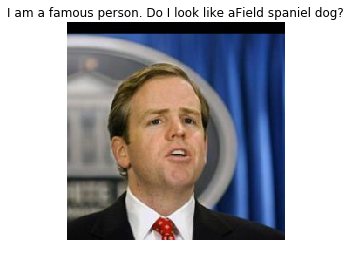

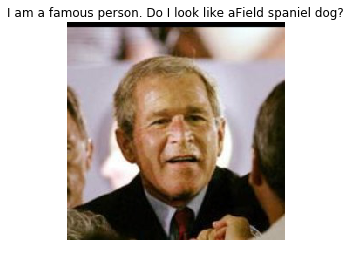

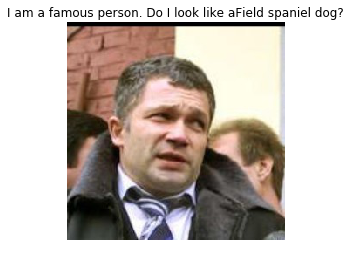

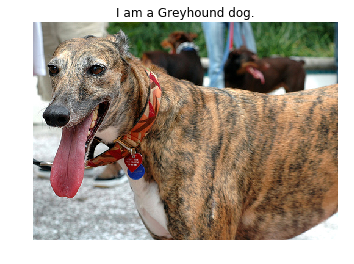

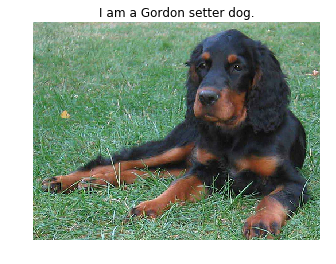

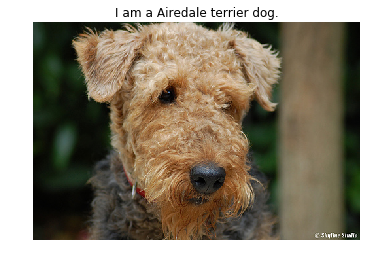

In [112]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.


## suggested code, below
for file in np.hstack((sample_human[:3], sample_dogs[:3])):
    run_app(file)

There are 9 total test images
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])


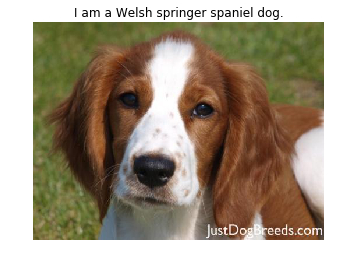

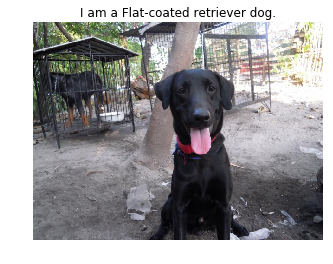

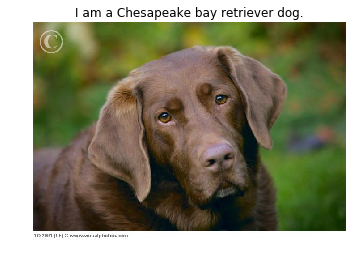

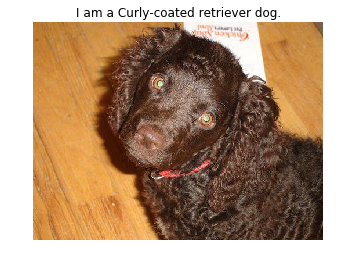

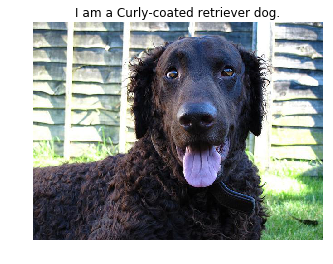

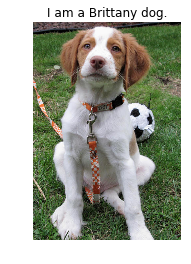

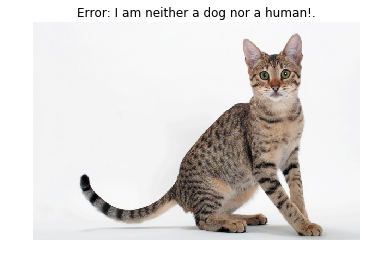

torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])


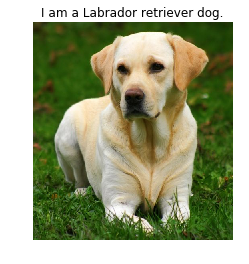

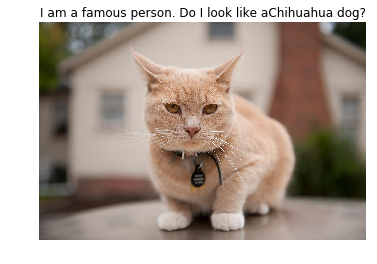

In [115]:

# Test algorithm on images provided in '/images' directory. Make predictions for each image. And show an example 
#  for each prediction.

test_files = np.array(glob("./test_images/*"))

# print number of images in each dataset
print('There are %d total test images' % len(test_files))

for file in np.hstack((test_files[:])):
    run_app(file)